# Data Visualization: World Bank + Renewable Energy Analysis 

# By: John G. Crowley

I took a project I completed for the University of Michigan Applied Data Science course, and expanded it to include more indepth visualizations and data story-telling. I wanted to see:
- Was there a more efficient and functional way to wrangle the data than before?
- How did countries compare to each other based on their 1. Size, 2. Renewable Energy %, 3. GDP rankings
- I wanted to explore the trade-off between a big economy and a renewable one. Or if one needs high GDP to change.

## --Preview the plots the wrangling and EDA will lead to--

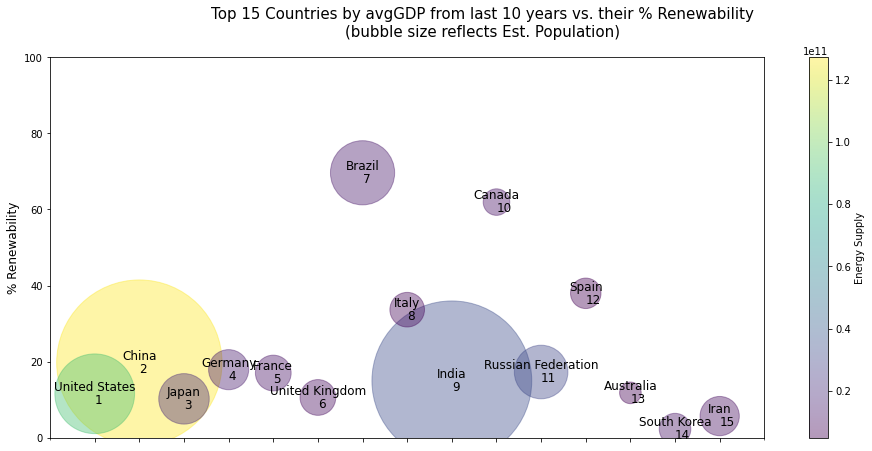

In [207]:
plot_countries()

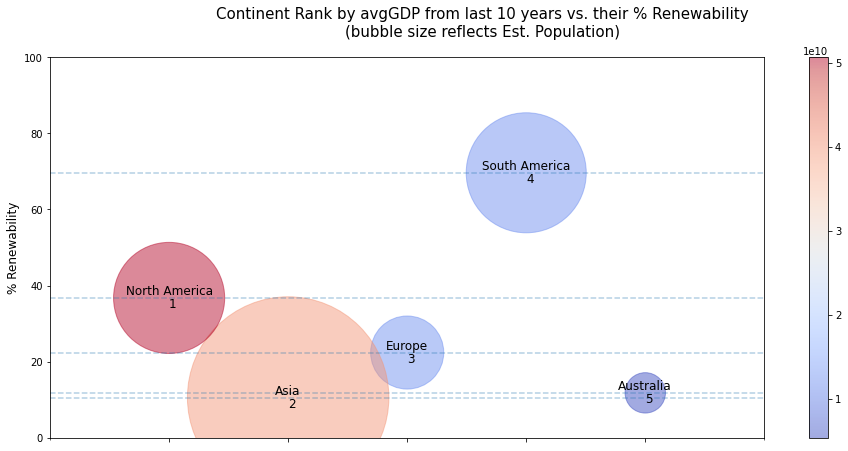

In [208]:
plot_continents()

## 1.) Data Wrangle each file (CSV, XLS); Prepare to merge

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline


#Read
df = pd.read_excel('assets/Energy Indicators.xls')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,Environmental Indicators: Energy,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Energy Supply and Renewable Electricity Produc...,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,Last update: December 2015


In [186]:
#Skip Header and Footer
df = df[17:244]
energy = df.iloc[:,2:]
energy.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
17,Afghanistan,321,10,78.66928
18,Albania,102,35,100
19,Algeria,1959,51,0.55101
20,American Samoa,...,...,0.641026
21,Andorra,9,121,88.69565


In [187]:
def clean_energy_df():
    #Rename Cols
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    #Clean ... to NaN's for Pandas
    energy.replace(to_replace='...', value=np.NaN, inplace=True)

    #Scale Energy to GigaJoules
    energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x: x * 1000000)

    #Tidy Country Names to just text
    energy['Country'].replace(to_replace='[\d*]',value='',regex=True,inplace=True)
    energy['Country'].replace(to_replace='( \(.*\))',value='',regex=True,inplace=True)

    renames = {"Republic of Korea": "South Korea",
                "United States of America": "United States",
                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy['Country'] = energy['Country'].replace(renames)
    return energy

In [188]:
energy = clean_energy_df()

In [189]:
df = pd.read_csv('assets/world_bank.csv')
gdp = df[4:268].copy()
gdp.head(2)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
4,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
5,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN


In [190]:
def clean_worldbank_df():
    renames = {"Korea, Rep.": "South Korea", 
                "Iran, Islamic Rep.": "Iran",
                "Hong Kong SAR, China": "Hong Kong"}
    gdp.rename(columns={'Data Source':'Country'}, inplace=True)
    gdp['Country'].replace(renames,inplace=True)
    
    #Replace all columns names listed as 'Unnamed: {digit}' with years
    x = 1960
    for y in range(4,60):
        gdp.rename(columns={'Unnamed: {0}'.format(y):x}, inplace=True)
        x+=1
        
    #String cast for dict-indexing
    gdp.columns = gdp.columns.astype(str)

    return gdp

In [191]:
gdp = clean_worldbank_df()

#### Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology
---- ranks countries based on their journal contributions in the aforementioned area

In [192]:
scimen = pd.read_excel('assets/scimagojr-3.xlsx')
scimen.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57


#### Merge World Bank GDP, Energy totals, and Journal contributions dataframe's into 1 DF:

In [193]:
new = pd.merge(scimen, energy, how='inner', on='Country')
merged_df = pd.merge(new, gdp, how='inner', on='Country')
merged_df.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,China,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
1,2,United States,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
2,3,Japan,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
4,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


#### Get  the last 10 Years of GDP, only the Top 15

In [194]:
merged_df.columns

Index(['Rank', 'Country', 'Documents', 'Citable documents', 'Citations',
       'Self-citations', 'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable',
       'World Development Indicators', 'Unnamed: 2', 'Unnamed: 3', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object')

In [195]:
(np.where(merged_df.columns == 'World Development Indicators'),np.where(merged_df.columns == '2006'))

((array([11]),), (array([60]),))

In [196]:
yearslice = merged_df.iloc[:,11:60].columns.tolist()

new_merged_df = merged_df.drop(merged_df[yearslice], axis=1)

df = new_merged_df.sort_values(by='Rank').iloc[:15]
df.set_index('Country',inplace=True)
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


#### Top 15 countries for average GDP over the last 10 years; add it to DF

In [197]:
def top_gdp_last_10_yrs():
    ten_yr_gdp = df.iloc[:,-10:]
    ten_yr_gdp['gdpAVG'] = ten_yr_gdp.apply(lambda x: np.mean(x),axis=1)
    ten_yr_gdp = ten_yr_gdp.sort_values(by='gdpAVG', ascending=False)
    avgGDP = ten_yr_gdp['gdpAVG']
    return avgGDP
df['avgGDP'] = top_gdp_last_10_yrs()

In [198]:
df['avgGDP_rank'] = df['avgGDP'].rank(ascending=False).apply(lambda x: int(x))
df['avgGDP_rank']

Country
China                  2
United States          1
Japan                  3
United Kingdom         6
Russian Federation    11
Canada                10
Germany                4
India                  9
France                 5
South Korea           14
Italy                  8
Spain                 12
Iran                  15
Australia             13
Brazil                 7
Name: avgGDP_rank, dtype: int64

## 2.) Create More Features:

#### What country has the maximum % Renewable and what is the percentage?

In [199]:
Most_Renewable = df.sort_values(by='% Renewable', ascending=False)
Country = Most_Renewable.index.tolist()[0]
Percentage = Most_Renewable.loc[Country]['% Renewable']
print(Country,Percentage)

Brazil 69.64803


#### Create a new column that is the ratio of Self-Citations to Total Citations. 

In [200]:
df['Ratio of Self/Total Citations'] = df['Self-citations'] / df['Citations']

#### What is the correlation (Pearson r) between Citation ratio and avg GDP for last 10 years?

In [201]:
pearson = df['Ratio of Self/Total Citations'].corr(top_gdp_last_10_yrs())
pearson

0.40589327005104175

#### Pop Estimate based on Energy Supply per Capita

In [202]:
df['PopEst'] = df['Energy Supply'] * 1000 / df['Energy Supply per Capita']

## 3.) I want to look at Continents and Countries by GDP over the past 10 years. 
- How do their rankings scatter them compared to the % Renewability of their energy supply? 
- Further, let's colorize the plot points by how great their energy supply is, and size the according to our estimated population from earlier.

#### Group by Continents for visualizations

In [203]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

grouped = df.groupby(ContinentDict)[['% Renewable','Ratio of Self/Total Citations','avgGDP','PopEst','Energy Supply']].agg(np.mean)
grouped = grouped.reset_index().rename(columns={'index':'Continents'}).set_index('Continents')

In [204]:
grouped['avgGDP_rank_by_continent'] = grouped['avgGDP'].rank(ascending=False).apply(lambda x: int(x))
grouped = grouped.sort_values('avgGDP_rank_by_continent',ascending=False)
grouped

,% Renewable,Ratio of Self/Total Citations,avgGDP,PopEst,Energy Supply,avgGDP_rank_by_continent
Continents,,,,,,
Australia,11.810810,0.171939,1.164043e+12,2.331602e+10,5.386000e+09,5
South America,69.648030,0.237159,2.189794e+12,2.059153e+11,1.214900e+10,4
Europe,22.407797,0.232168,2.294395e+12,7.632161e+10,1.232333e+10,3
Asia,10.588777,0.356820,3.042197e+12,5.797333e+11,3.990980e+10,2
North America,36.758205,0.262700,8.512496e+12,1.764276e+11,5.063450e+10,1


# Continent Rankings Plot

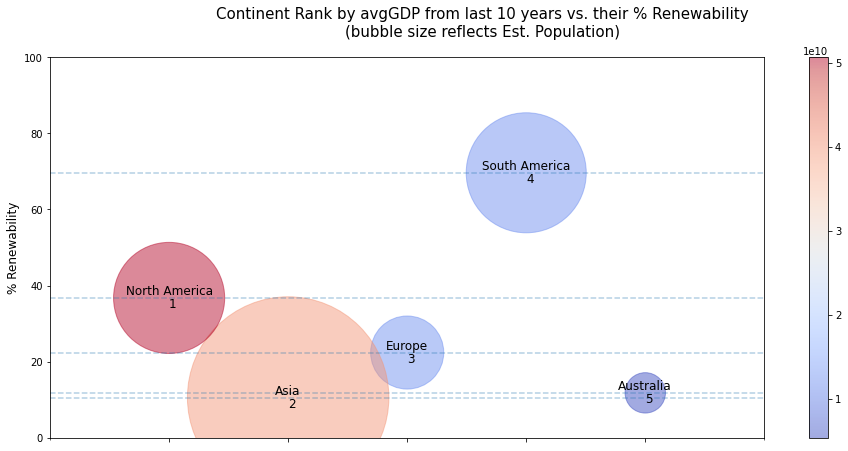

In [205]:
def plot_continents():
    viridis = cm.get_cmap('viridis', 6)

    axes2 = grouped.plot('avgGDP_rank_by_continent','% Renewable',kind='scatter',
                         c=grouped['Energy Supply'],xticks=range(1,6),s=(7*grouped['PopEst']/10**8),
                         cmap='coolwarm',alpha=0.47,figsize=(16,7));

    for i, label in enumerate(grouped.index):

        axes2.annotate(label,[grouped['avgGDP_rank_by_continent'].iloc[i],grouped['% Renewable'].iloc[i]],ha='center',va='bottom',size=12);
        plt.hlines(grouped['% Renewable'],xmin=0,xmax=6,linestyles='dashed',alpha=0.07);
    for i, label in enumerate(grouped['avgGDP_rank_by_continent']):
        axes2.annotate(label,[grouped['avgGDP_rank_by_continent'].iloc[i],grouped['% Renewable'].iloc[i]],va='top',size=12);

    axes2.set_xlim(0,6);
    axes2.set_ylim(0,100);
    plt.suptitle('Continent Rank by avgGDP from last 10 years vs. their % Renewability\n(bubble size reflects Est. Population)\n',ha='center',fontsize='15');
    axes2.set_ylabel('% Renewability',fontsize='12');


    print('\n\n')
    return plt.show()
plot_continents()

# Country GDP Ranking Plot

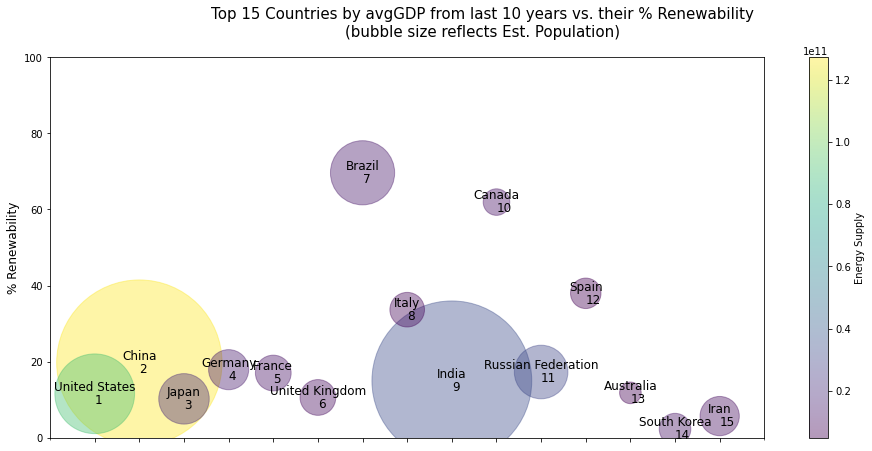

In [206]:
def plot_countries():
    axes = df.plot(x='avgGDP_rank',y='% Renewable',kind='scatter',xticks=range(1,16),
            s=(2*df['PopEst']/10**8),c='Energy Supply',alpha=.40,cmap="viridis",figsize=(16,7));

    for i, label in enumerate(df.index):
        axes.annotate(label,[df['avgGDP_rank'].iloc[i],df['% Renewable'].iloc[i]],ha='center',va='bottom',size=12);
    for i, label in enumerate(df['avgGDP_rank']):
        axes.annotate(label,[df['avgGDP_rank'].iloc[i],df['% Renewable'].iloc[i]],va='top',size=12);
    axes.set_xlim(0,16);
    axes.set_ylim(0,100);
    plt.suptitle('Top 15 Countries by avgGDP from last 10 years vs. their % Renewability\n(bubble size reflects Est. Population)\n',ha='center',fontsize='15');
    plt.xlabel('Country GDP Rankings 2005-20015',fontsize='12');
    plt.ylabel('% Renewability',fontsize='12');
    print('\n\n')
    return plt.show()
plot_countries()